# Challenge: Analyzing Text about Scool Of Information Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data.

### Goal
Let's try to discover more related concepts of School of information science by doing some `text mining`. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

- As a text, I will use the page on School of information science from Wikipedia:

In [2]:
url = 'https://fr.wikipedia.org/wiki/%C3%89cole_des_sciences_de_l%27information'

## Step 1: Getting the Data
First step in every data science process is getting the data. We will use requests library to do that:

In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="fr" dir="ltr">
<head>
<meta charset="UTF-8">
<title>École des sciences de l'information — Wikipédia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )frwikimw

## Step 2: Transforming the Data
The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the HTMLParser class and define the code that will collect all text inside HTML tags, except <script> and <style> tags.

In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 École des sciences de l'information — Wikipédia Aller au contenu Menu principal Menu principal déplacer vers la barre latérale masquer 
		Navigation
	 Accueil Portails thématiques Article au hasard Contact 
		Contribuer
	 Débuter sur Wikipédia Aide Communauté Modifications récentes Faire un don Langues Sur cette version linguistique de Wikipédia, les liens interlangues sont placés en haut à droite du titre de l’article. Aller en haut . Rechercher Rechercher Créer un compte Se connecter Outils personnels Créer un compte Se connecter 
		Pages pour les contributeurs déconnectés  en savoir plus Contributions Discussion Sommaire déplacer vers la barre latérale masquer Début 1 Présentation 2 Missions 3 Admission 4 Filières à l'ESI Afficher / masquer la sous-section Filières à l'ESI 4.1 Quatre filières du cycle ingénieur 4.2 Deux filières du cycle Master spécialisé 4.3 Deux filières du cycle Doctorat 5 Master 6 Recherche 7 Clubs 8 Liens externes 9 Notes et références Basculer la table des ma

## Step 3: Getting Insights
The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present:

In [ ]:
import sys
!{sys.executable} -m pip install nlp_rake

The main functionality is available from Rake object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('systèmes d’information', 4.0),
 ('formation', 1.4545454545454546),
 ('l’information', 1.4),
 ('ingénieur', 1.4),
 ('filières', 1.375),
 ("l'esi", 1.3333333333333333),
 ('maroc', 1.2857142857142858),
 ('école', 1.1666666666666667),
 ('sciences', 1.1538461538461537),
 ('wikipédia', 1.0),
 ('savoir', 1.0),
 ("l'information", 1.0),
 ('l’esi', 1.0),
 ("l'école", 1.0),
 ('connaissances', 1.0),
 ('étudiants', 1.0),
 ('ingénierie', 1.0)]

We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such `as systèmes d’information` and `ingénieur`, are present in the list at top positions.

## Step 4: Visualizing the Result
People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

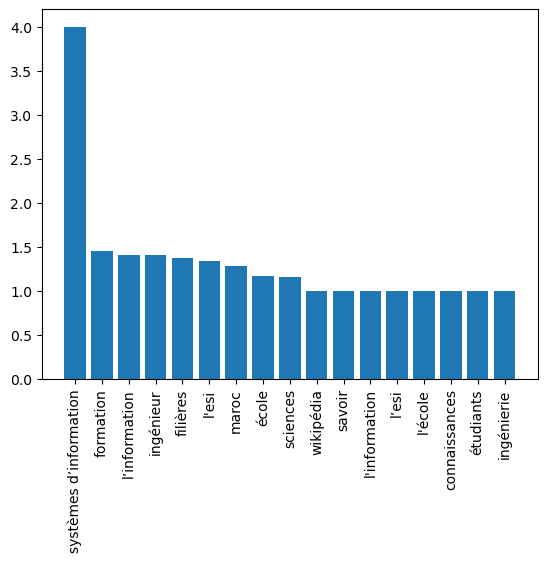

In [7]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using `Word Cloud`. We will need to install another library to plot the word cloud from our keyword list.

In [ ]:
!{sys.executable} -m pip install wordcloud

`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

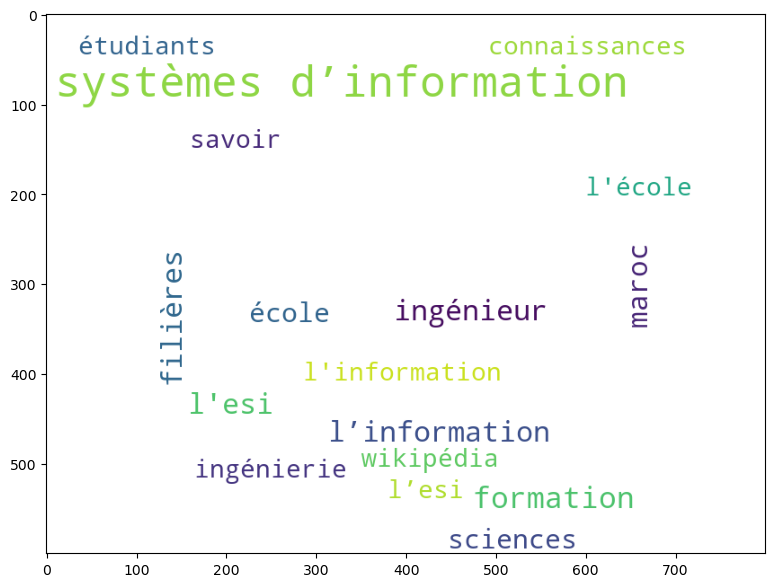

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

In this example we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.